In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/')

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/test.zip', 'r') as z:
  z.extractall()

In [0]:
with ZipFile('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/train.zip', 'r') as z:
  z.extractall()

In [0]:
x_test=[]
os.chdir('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/test')
import cv2
for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(128,128))
    x_test.append(dummy)

In [0]:
x_train = []
y_train = []

In [0]:
os.chdir('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/train')

In [10]:
os.listdir()

['Fat Hen',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Sugar beet',
 'Shepherds Purse',
 'Charlock',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Maize',
 'Common Chickweed',
 'Common wheat',
 'vgg16_best.h5']

In [11]:
x_train = []
y_train = []
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)


Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat
vgg16_best.h5


In [12]:
x_train[0].shape

(128, 128, 3)

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)

In [0]:
encoded_labels = dum
y_train = dum

In [0]:
import numpy as np
y_train = np.array(y_train)

In [0]:
x_train = np.array(x_train)
x_test2 = np.array(x_test)

In [18]:
x_train[0].shape

(128, 128, 3)

In [19]:
x_test2.shape

(794, 128, 128, 3)

In [21]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

3800
950


In [22]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [0]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [0]:
x_train2 = x_train2/255.

x_val = x_val/255.

In [26]:
print (x_train2.shape)
print (x_val.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [27]:
print(y_train2.shape)
print(y_val.shape)

(3800, 12)
(950, 12)


In [28]:
from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [29]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))





80142336/80134624 [==============================] - 3s 0us/step








In [30]:
# Freeze the layers which you don't want to train. In this we are freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
predictions = Dense(12, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer ='SGD' , metrics=["accuracy"]) #optimizers.SGD(lr=0.001)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [32]:
# Save the model 
checkpoint = ModelCheckpoint("/content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/vgg16_best.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

epochs=30
# Train the model 
history = model_final.fit(x_train2, y_train2, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early])
history

Train on 3800 samples, validate on 950 samples
Epoch 1/30
3800/3800 [==============================] - 11s 3ms/step - loss: 2.3925 - acc: 0.1771 - val_loss: 2.1954 - val_acc: 0.2389

Epoch 00001: val_acc improved from -inf to 0.23895, saving model to /content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/vgg16_best.h5
Epoch 2/30
3800/3800 [==============================] - 11s 3ms/step - loss: 1.9256 - acc: 0.3400 - val_loss: 2.6459 - val_acc: 0.1516

Epoch 00002: val_acc did not improve from 0.23895
Epoch 3/30
3800/3800 [==============================] - 10s 3ms/step - loss: 1.4651 - acc: 0.5026 - val_loss: 1.0202 - val_acc: 0.6274

Epoch 00003: val_acc improved from 0.23895 to 0.62737, saving model to /content/drive/My Drive/PGP AIML/Project Assignment/R8 COmputer Vision with CNN Project 1/vgg16_best.h5
Epoch 4/30
3800/3800 [==============================] - 10s 3ms/step - loss: 1.6853 - acc: 0.4237 - val_loss: 1.5108 - val_acc: 0.4589

Epoch 00004:

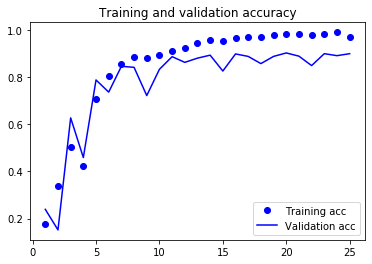

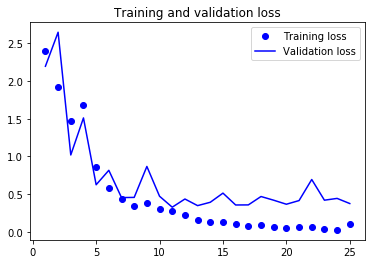

In [33]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [38]:
x_test3 = x_test2/255
x_test3.shape

(794, 128, 128, 3)

In [56]:
y_pred = model_final.predict(x_test3)
pred2 = [np.around(value) for value in y_pred]
print (y_pred)


[[5.26810462e-09 1.53126479e-07 3.84809084e-07 ... 3.22500309e-05
  1.55167115e-10 4.67361861e-06]
 [6.48643322e-07 3.34841673e-07 3.92000743e-09 ... 1.94744302e-07
  8.36729741e-10 9.97757375e-01]
 [5.48431526e-05 3.45225203e-06 1.60253398e-06 ... 9.74526770e-08
  9.84484458e-08 9.97747123e-01]
 ...
 [1.17817173e-10 2.33006192e-09 2.16320899e-08 ... 1.00517084e-07
  9.99999881e-01 6.75326114e-13]
 [9.69540834e-01 1.70702660e-05 1.96508932e-04 ... 5.72200292e-07
  3.08602557e-06 1.45632623e-06]
 [3.36120982e-04 8.47866090e-07 2.68594221e-07 ... 1.10709086e-08
  1.60012223e-06 1.51407988e-08]]
